<div class="alert alert-block alert-warning">
Correlations can be done on two continuous variables, to determine the relationship between them. A correlation can be between zero and one, and either positive or negative. The larger it is, the more closely related the two variables are.
<br>
<b>Requires:</b><br>
    - 2 <i>continuous</i> variables<br>
</div>

## QUESTION:
Is there a relationship between `number of passengers` and `number of cabins` on cruise ships?

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
cruise_ship = pd.read_excel('./assets/cruise_ship.xlsx')

In [3]:
cruise_ship.head()

,Ship,Line,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,Journey,Azamara,2007,30277,694,594,355,355,42.64,329
1,Quest,Azamara,2007,30277,694,594,355,355,42.64,329
2,Celebration,Carnival,1987,47262,1486,722,743,670,31.80,453
3,Conquest,Carnival,2002,110000,2974,953,1488,1910,36.99,892
4,Destiny,Carnival,1996,101353,2642,892,1321,1000,38.36,740


## Run One Correlation

Using the function `.corr()`, it's easy to run a correlation on a selected two variables. For instance, do you think that the number of passengers and the number of cabins on a cruise ship would relate to each other?

In [4]:
cruise_ship['passngrs'].corr(cruise_ship['Cabins'])

0.976341367984594

It should not come as a surprise to you that the number of passengers and the number of cabins are very related. .97 is about as strong as a correlation gets! This correlation is also positive, which means that as the number of passengers increase, so does the number of cabins, and vice versa.

## Create a Correlation Matrix

Running one correlation can be nice, but sometimes you'd like to know how all your data relates to each other! In that case, call in the big guns, and go for a correlation matrix!

### Drop Non-Continuous Variables

When you are creating a correlation matrix, you are feeding the code your entire data set. But you can only run Pearson's correlations on continuous variables! So it's important to drop anything that is categorical or a string first.<br><br>
As you'll recall, the `.drop()` function will remove any columns specified in the square brackets, and the `axis=1` arguments tells Python that these are the names of columns (not rows). So you are getting rid of the `Ship` and `Line` columns here.

In [5]:
cruise_ship1 = cruise_ship.drop(['Ship', 'Line'], axis=1)

#### You can confirm that everything worked as expected:

In [6]:
cruise_ship1.head()

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
0,2007,30277,694,594,355,355,42.64,329
1,2007,30277,694,594,355,355,42.64,329
2,1987,47262,1486,722,743,670,31.80,453
3,2002,110000,2974,953,1488,1910,36.99,892
4,1996,101353,2642,892,1321,1000,38.36,740


## Using .corr() on An Entire Dataset

You will not believe how easy it is to get all correlations at your fingertips!<br><br>
Just put in the name of your cleaned up dataset, call the `.corr()` function, and specify `method='pearson'` and away you go!

In [7]:
cruise_ship1.corr(method='pearson')

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.000000,0.606646,0.515542,0.532286,0.510019,0.530657,0.278830,0.547203
Tonnage,0.606646,1.000000,0.945061,0.922368,0.948764,0.927569,-0.040846,0.921931
passngrs,0.515542,0.945061,1.000000,0.883535,0.976341,0.915234,-0.294867,0.914551
Length,0.532286,0.922368,0.883535,1.000000,0.889798,0.895857,-0.090488,0.901047
Cabins,0.510019,0.948764,0.976341,0.889798,1.000000,0.950823,-0.253181,0.934136
Crew,0.530657,0.927569,0.915234,0.895857,0.950823,1.000000,-0.155509,0.900466
PassSpcR,0.278830,-0.040846,-0.294867,-0.090488,-0.253181,-0.155509,1.000000,-0.145602
outcab,0.547203,0.921931,0.914551,0.901047,0.934136,0.900466,-0.145602,1.000000


<mark>Remember that you read only the top right or bottom left of this matrix; everything repeats after the diagonal row of ones.</mark>

## Make `.corr()` Pretty!

Not pretty enough for you? Difficult to make sense of rows and rows of numbers? Well, you're in luck. Adding a couple arguments can help you interpret things and add a little visual interest.<br><br>
Start by using the `.style.format()` function. In it, you will place `{:.2}` to specify the gradients. Then you can use `background_gradient()` to specify the colors. This pulls the `coolwarm` palette from `matplotlib pyplot`. `cmap=` stands for color map. Then lastly, you need the argument `axis=1` so that Python knows you are focused on columns.

In [11]:
cruise_ship1.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,YearBlt,Tonnage,passngrs,Length,Cabins,Crew,PassSpcR,outcab
YearBlt,1.0,0.61,0.52,0.53,0.51,0.53,0.28,0.55
Tonnage,0.61,1.0,0.95,0.92,0.95,0.93,-0.041,0.92
passngrs,0.52,0.95,1.0,0.88,0.98,0.92,-0.29,0.91
Length,0.53,0.92,0.88,1.0,0.89,0.9,-0.09,0.9
Cabins,0.51,0.95,0.98,0.89,1.0,0.95,-0.25,0.93
Crew,0.53,0.93,0.92,0.9,0.95,1.0,-0.16,0.9
PassSpcR,0.28,-0.041,-0.29,-0.09,-0.25,-0.16,1.0,-0.15
outcab,0.55,0.92,0.91,0.9,0.93,0.9,-0.15,1.0


## Use sns.heatmap()

You can also do a correlation matrix easily using the `seaborn` package.
<br><br>
Just put in your dataset name as an argument, then call the `.corr()` function again, and use the argument `annot=True` to have the values printed on the plot. There's a little less customization here, but it's also a little simpler, with fewer arguments.

<AxesSubplot:>

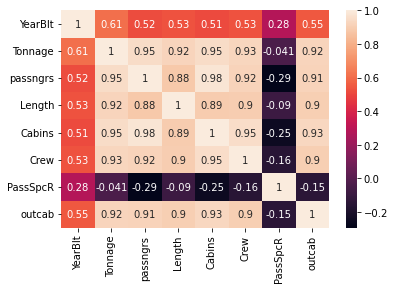

In [10]:
sns.heatmap(cruise_ship1.corr(), annot=True)

# `###`